In [4]:
import pandas as pd

# Define a function to read and parse the text file
def parse_txt(filename):
    data = []
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split(": ")
            if len(parts) == 2:
                iteration, time = parts
                iteration_num = int(iteration.split()[1])
                time_val = int(time.split()[0])
                data.append((iteration_num, time_val))
    return pd.DataFrame(data, columns=['Iteration', 'Time (microseconds)'])

# File paths
file_paths = [
    "poission_2D_finitediff.txt",
    "poisson_jacobi.txt",
    "poisson_SOR.txt"
]

# Create DataFrames for each file
dfs = {}
for file_path in file_paths:
    df_name = file_path.split('.')[0]  # Extracting the name without extension
    dfs[df_name] = parse_txt(file_path)

# Print the first few rows of each DataFrame
for name, df in dfs.items():
    print(f"DataFrame '{name}':")
    print(df.head())
    print()


DataFrame 'poission_2D_finitediff':
   Iteration  Time (microseconds)
0          1                  423
1          2                  430
2          3                  420
3          4                  400
4          5                  400

DataFrame 'poisson_jacobi':
   Iteration  Time (microseconds)
0          1                 2534
1          2                 1946
2          3                 1303
3          4                 1329
4          5                 1334

DataFrame 'poisson_SOR':
   Iteration  Time (microseconds)
0          1                  480
1          2                  449
2          3                  467
3          4                  540
4          5                  434



In [17]:
# Calculate the average time for each DataFrame
average_times = {}

for name, df in dfs.items():
    average_time = df['Time (microseconds)'].mean()
    average_times[name] = average_time

# Print the average time for each DataFrame
for name, average_time in average_times.items():
    print(f"Average Time (microseconds) for {name}: {average_time}")


Average Time (microseconds) for poission_2D_finitediff: 152.4634317862166
Average Time (microseconds) for poisson_jacobi: 642.8826516220029
Average Time (microseconds) for poisson_SOR: 286.951690821256


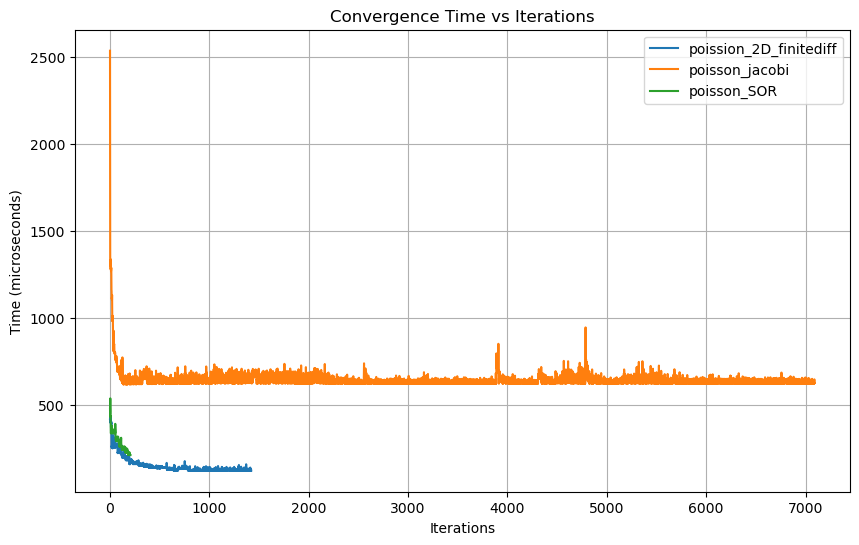

In [5]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))

for name, df in dfs.items():
    plt.plot(df['Iteration'], df['Time (microseconds)'], label=name)

plt.title('Convergence Time vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Time (microseconds)')
plt.legend()
plt.grid(True)
plt.show()


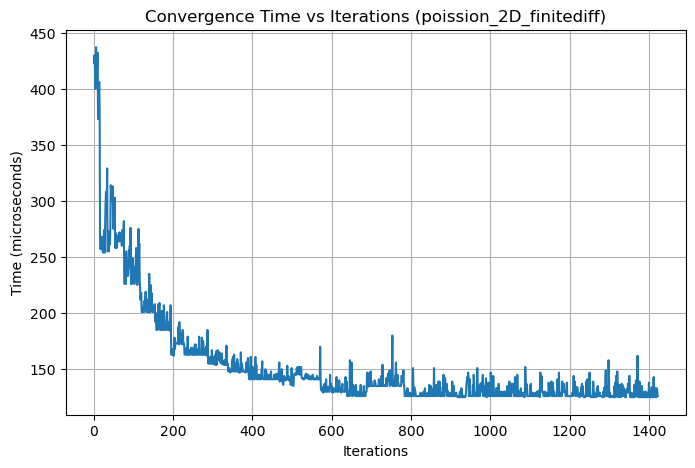

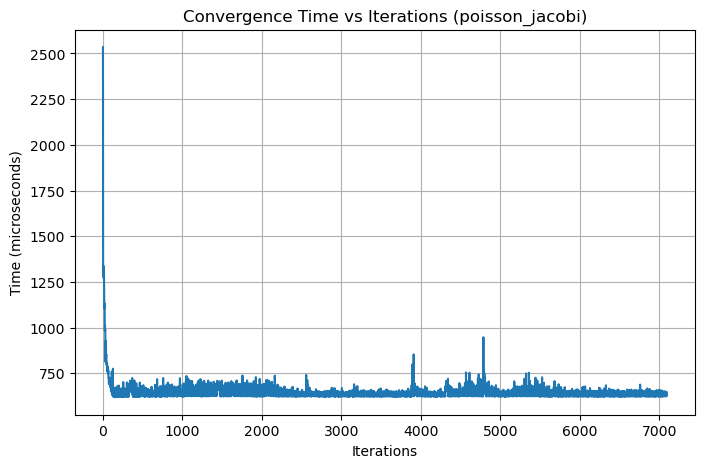

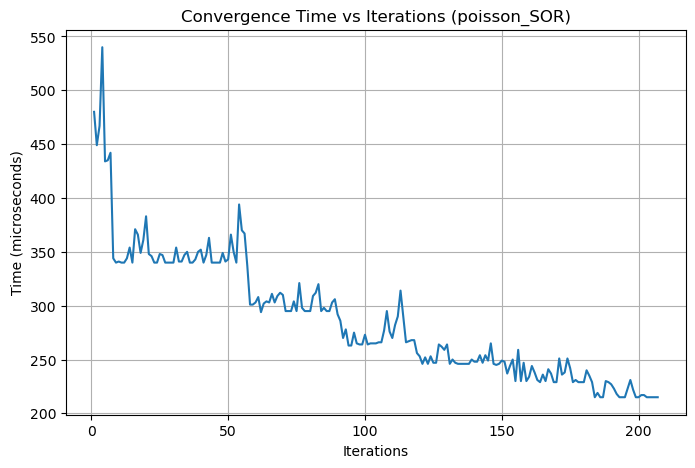

In [7]:
import matplotlib.pyplot as plt

# Plotting each DataFrame separately
for name, df in dfs.items():
    plt.figure(figsize=(8, 5))
    plt.plot(df['Iteration'], df['Time (microseconds)'])
    plt.title(f'Convergence Time vs Iterations ({name})')
    plt.xlabel('Iterations')
    plt.ylabel('Time (microseconds)')
    plt.grid(True)
    plt.show()


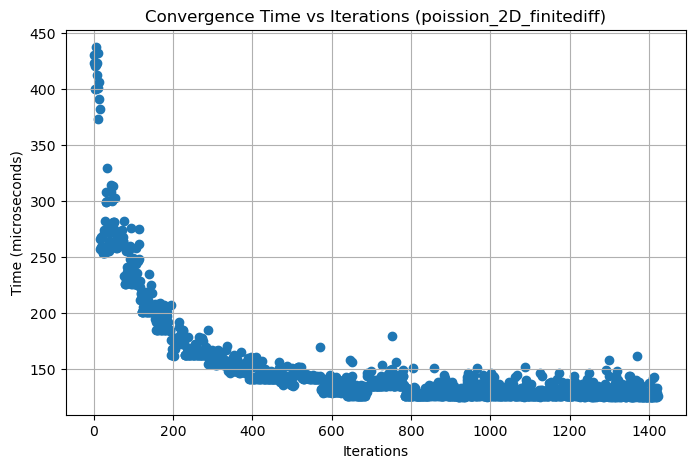

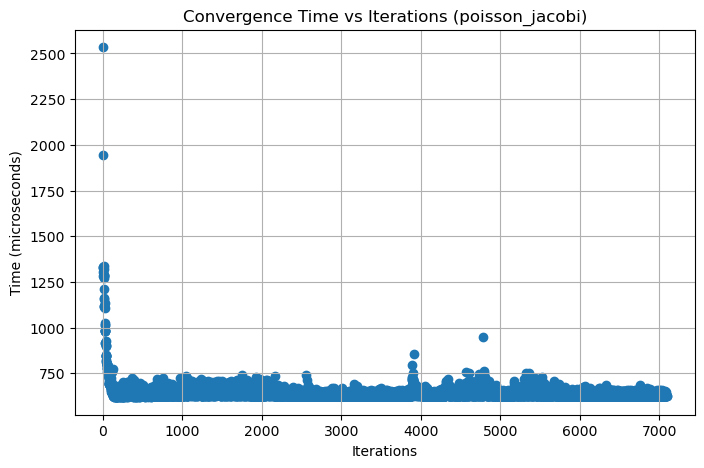

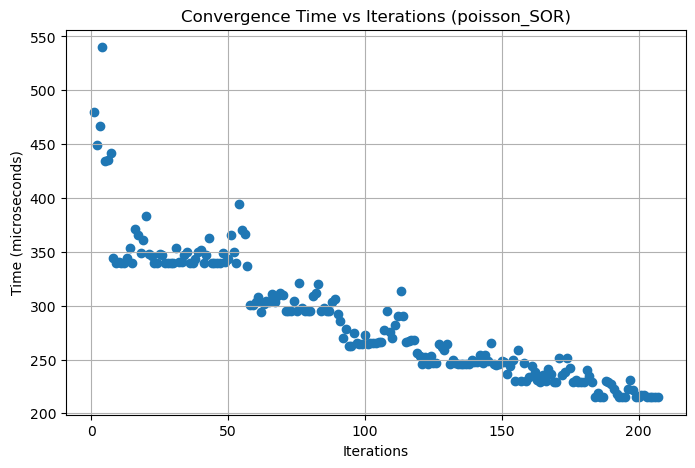

In [8]:
import matplotlib.pyplot as plt

# Plotting each DataFrame separately
for name, df in dfs.items():
    plt.figure(figsize=(8, 5))
    plt.scatter(df['Iteration'], df['Time (microseconds)'])
    plt.title(f'Convergence Time vs Iterations ({name})')
    plt.xlabel('Iterations')
    plt.ylabel('Time (microseconds)')
    plt.grid(True)
    plt.show()


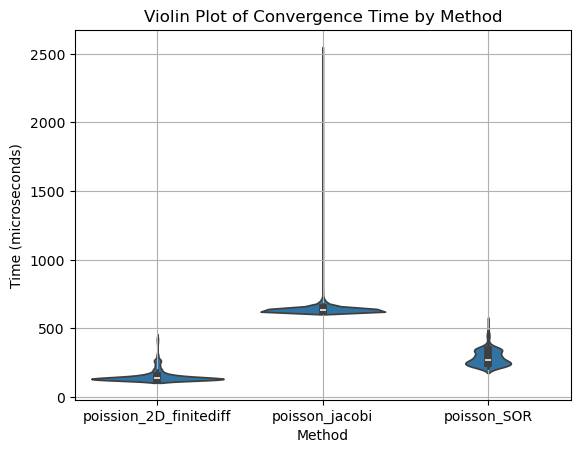

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate the DataFrames into one DataFrame with an additional column for the method name
dfs_concatenated = pd.concat([df.assign(Method=name) for name, df in dfs.items()])

# Create Violin plot
sns.violinplot(x='Method', y='Time (microseconds)', data=dfs_concatenated)
plt.title('Violin Plot of Convergence Time by Method')
plt.xlabel('Method')
plt.ylabel('Time (microseconds)')
plt.grid(True)
plt.show()



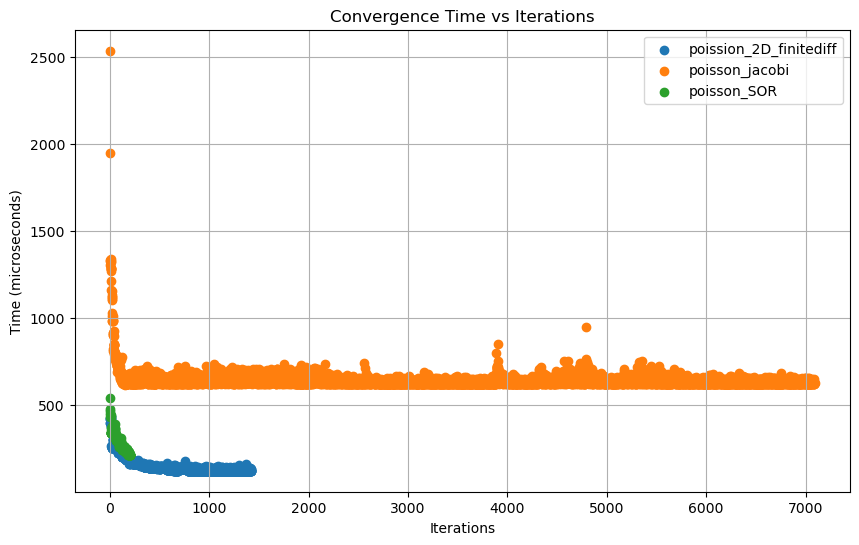

In [15]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))

for name, df in dfs.items():
    plt.scatter(df['Iteration'], df['Time (microseconds)'], label=name)

plt.title('Convergence Time vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Time (microseconds)')
plt.legend()
plt.grid(True)
plt.show()
